In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [9]:
def convert(str):
    if str == 'Diesel':
        return 1
    else:
        return 0

In [10]:
train_input = pd.read_csv('ToyotaCorolla_train.csv')
test_input = pd.read_csv('ToyotaCorolla_test.csv')

train_input['Fuel_Type'].head()

0    Petrol
1    Petrol
2    Petrol
3    Petrol
4    Petrol
Name: Fuel_Type, dtype: object

In [39]:
train_input['Fuel_Type'] = train_input['Fuel_Type'].apply(convert)
test_input['Fuel_Type'] = test_input['Fuel_Type'].apply(convert)

In [64]:
x_train = np.array(train_input.iloc[:, 3:])
y_train = np.array(train_input.iloc[:, 2])
x_test = np.array(test_input.iloc[:, 3:])
y_test = np.array(test_input.iloc[:, 2])

In [65]:
model = LinearRegression() # 모델 정의
model.fit(x_train, y_train) # 모델 학습
pred = model.predict(x_test) # 모델 예측

In [68]:
rmse = math.sqrt(mean_squared_error(pred, y_test))
print("%.6f" % rmse)

1017.335408


In [69]:
print("weights:", model.coef_) # 변수 별 가중치
print("intercept:", model.intercept_) # 편향

weights: [-1.15843330e+02 -9.91372574e+01  1.79150490e+01 -1.92461349e-02
  1.62003744e-11  2.29523715e+01 -5.38625930e+01  3.90150451e+02
 -9.55023970e-02  8.31159046e+01 -3.35376171e-12  2.69246528e+02
  7.45941577e+00  1.02778724e+01  2.14044146e+02  5.73091637e+02
  7.26750869e+01 -4.01852871e+02  1.28280985e+02  2.54956408e+01
  1.70610409e+02  2.52769286e+03 -2.99398233e+02  1.95816134e+02
 -9.86043350e+01  4.73496618e+02 -1.63377327e+02  7.89112016e+02
 -3.99697400e+01  3.78769612e+02 -9.58015888e+01  2.14472196e+02
 -8.64716443e+02 -2.00113181e+02]
intercept: -33206.24439550632


In [70]:
example = x_test[0]
print("example:", example)
#print("calculation:", np.dot(example, model.coef_) + model.intercept_) # 예측값 직접 계산
print("prediction:", pred[0]) 
print("y value:", y_test[0])

example: [   63     6  1999 57413     0   107     0     1  1600     5     4     5
    85  1115     1     1     3     1     1     1     0     0     0     0
     0     0     1     0     0     1     1     0     0     0]
prediction: 11033.62290126121
y value: 10500


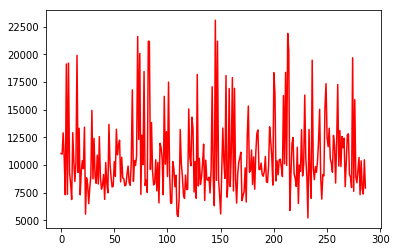

In [75]:
#plt.scatter(x_test[],y_test)
plt.plot(pred, color='red')
plt.show()